In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Mounted at /content/drive
 Barcelona	       Europass				     NN
'challenge 2.avi'     'Foglio di lavoro senza nome.gsheet'   ROC.gsheet
'Colab Notebooks'     'forces in fluids.gsheet'		     USB
'cours physique.zip'   kreisel.gsheet
 elasticity.gsheet    'Magn hysteresis.gsheet'


In [ ]:
#test stability of Network: use fc, 2 layers, 64

In [ ]:
x = np.load("/content/drive/My Drive/NN/data/training_data.npy").astype(np.float32)
x_1 = np.load("/content/drive/My Drive/NN/data/testing_data.npy").astype(np.float32)

n_samples = x.shape[1]
n_channels = x.shape[2]
n_classes = 2

x_train = np.reshape(x, (x.shape[0], -1))  #for fc network: shape is (150000, 256)
#x_train = np.expand_dims(x, axis=-1) #for cnn network

x_test = np.reshape(x_1, (x_1.shape[0], -1))  #for fc network: shape is (950000, 256)
#x_test = np.expand_dims(x_1, axis=-1) #for cnn network

print(x_train.shape, x_test.shape)

(150000, 256) (950000, 256)


In [ ]:
# define labels with one hot encoding, (1,0) -> noise, (0,1) -> signal
y_train = np.zeros((x.shape[0], 2))
y_train[:75000, 1] = 1
y_train[75000:, 0] = 1

y_test = np.zeros((x_1.shape[0], 2))
y_test[:25000, 1] = 1
y_test[25000:, 0] = 1


tot_n = int(y_test[25000:,0].sum())
tot_s = int(y_test[:25000,1].sum())

print(y_train.shape, y_test.shape)

(150000, 2) (950000, 2)


In [ ]:
BATCH_SIZE = 32
EPOCHS = 4
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]

model nr. 1
Epoch 1/4
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1795 - accuracy: 0.9146 - val_loss: 0.0113 - val_accuracy: 0.9986
Epoch 2/4
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0151 - accuracy: 0.9959 - val_loss: 0.0106 - val_accuracy: 0.9977
Epoch 3/4
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.0082 - val_accuracy: 0.9982
model nr. 2
Epoch 1/4
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1554 - accuracy: 0.9275 - val_loss: 0.0144 - val_accuracy: 0.9977
Epoch 2/4
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0148 - accuracy: 0.9961 - val_loss: 0.0074 - val_accuracy: 0.9986
Epoch 3/4
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.0182 - val_accuracy: 0.9938
Epoch 4/4
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0075 - accuracy: 0.9982 - val_loss: 0.023

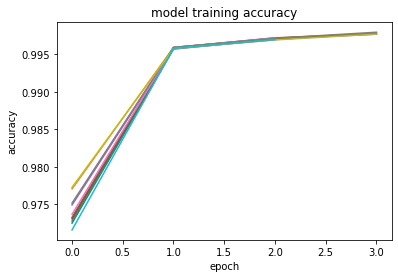

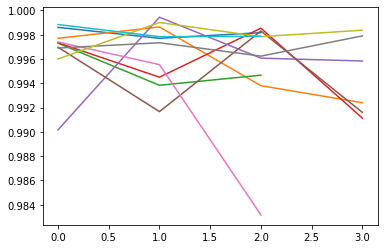

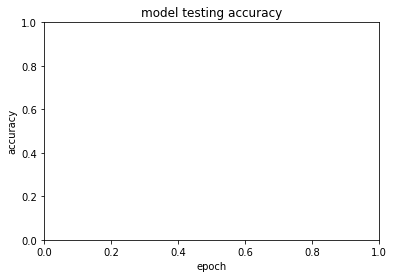

In [ ]:
# train same network multiple times

fig1 = plt.figure(1)
fig2 = plt.figure(2)


for i in range(10):
  var = str(i+1)
  print('model nr. '+ var)

  model  = keras.Sequential(
    [
        Dense(64, activation="relu", name="layer1", input_dim=x_train.shape[-1]),
        Dense(64, activation="relu", name="layer2"),
        Dense(n_classes, activation="softmax", name="layer3"),
    ]
  )
  #1D - Convolutional Network
  #model = Sequential(
   #  [
    #    Conv1D(10, 10, activation='relu', name="layer1", input_shape=(n_samples, n_channels)), # n_filters, n_width
     #   Conv1D(10, 10, activation='relu', name="layer2"), # n_filters, n_width
      #  Dropout(0.5, name="layer4"),
       # MaxPooling1D(pool_size=(7), name="layer4"),
       # Flatten(name="layer5"),
        #Dense(n_classes, activation='softmax', name="layer6")
     #]
  #)
  model.compile(optimizer='Adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])


  history = model.fit(x_train,y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          callbacks=callbacks_list,
          validation_split=0.2,
          verbose=1)
  plt.figure(1)
  plt.plot(history.history['accuracy'])
  plt.figure(2)
  plt.plot(history.history['val_accuracy'])
  
  #model.save(f'/content/drive/My Drive/NN/Stability/stab_cnn_2l10_'+var+'.h5')

  # summarize history for accuracy
plt.figure(1)
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(2)
plt.title('model testing accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
acc = np.array([0.9975, 0.9973, 0.9977, 0.9975, 0.9972, 0.9977, 0.9976, 0.9973, 0.9975, 0.997])
acc1 = np.array([0.9957, 0.9964, 0.9962, 0.9959, 0.9963, 0.9957, 0.9959, 0.9963, 0.9962, 0.996])
print(np.mean(acc), np.std(acc))

0.9974299999999999 0.0002147091055358628


In [ ]:
#model prediction + efficiency curve

tot_n = int(y_test[:,0].sum())
tot_s = int(y_test[:,1].sum())

yy = np.log10(np.linspace(10 ** 0.000001, 10 ** 0.999999, 10000))
n_vec = np.zeros((10, len(yy)))
s_vec = np.zeros((10, len(yy)))

In [ ]:
for k in range(10):
  var = str(k+1)

  
  print('predict step: '+ var)
  model = keras.models.load_model(f'/content/drive/My Drive/NN/Stability/stab_cnn_2l10_'+var+'.h5', compile=False)
  y_pred = model.predict(x_test) #X_test, or np.reshape(X_test, (X_test.shape[0], -1))
  print(y_pred)


  for iT, threshold in enumerate(yy):
      eff_signal = np.sum((y_pred[:25000, 1] > threshold) == True) / tot_s
      s_vec[k, iT] = eff_signal
      eff_noise = np.sum((y_pred[25000:, 1] > threshold) == False) / tot_n
    
      if eff_noise < 1:
          reduction_factor = np.log10(1 / (1 - eff_noise))
      else:
          reduction_factor = np.log10(tot_n) # 5 Oom, dependent on tot data
      n_vec[k, iT] = 10 ** reduction_factor




predict step: 1


ValueError: ignored

In [ ]:
#calculate signals at noise>10**5

s_vec = np.load(f"/content/drive/My Drive/NN/Stability/signals_cnn.npy").astype(np.float32)
n_vec = np.load(f"/content/drive/My Drive/NN/Stability/noises_cnn.npy").astype(np.float32)
print(s_vec.shape, n_vec.shape)

s_at_noise = []

for k in range(len(n_vec[:,0])):
  o = 0
  n = n_vec[k,:]
  s = s_vec[k,:]
  


  
  while n[o] < 10**4:
    o+=1
  
  if s[o] == 0:
    while s[o] == 0:
      o-=1
  
  print(f'Noise rejection factor at 10⁵ (10e({np.log10(n[o])})) = {s[o]*100}%')
  print(s[o])

  s_at_noise.append(s[o])
    
#  for i in range(len(n)):
 #   if n[i] == n[o]:
  #    s_at_noise.append(s[i])
      

print('Ave: ', np.mean(s_at_noise))
print('std: ', np.std(s_at_noise))

(10, 10000) (10, 10000)
Noise rejection factor at 10⁵ (10e(4.002353668212891)) = 99.35600161552429%
0.99356
Noise rejection factor at 10⁵ (10e(4.002353668212891)) = 99.24799799919128%
0.99248
Noise rejection factor at 10⁵ (10e(4.002353668212891)) = 99.29999709129333%
0.993
Noise rejection factor at 10⁵ (10e(4.0071001052856445)) = 99.30400252342224%
0.99304
Noise rejection factor at 10⁵ (10e(4.002353668212891)) = 99.27200078964233%
0.99272
Noise rejection factor at 10⁵ (10e(4.002353668212891)) = 99.28799867630005%
0.99288
Noise rejection factor at 10⁵ (10e(4.002353668212891)) = 99.16800260543823%
0.99168
Noise rejection factor at 10⁵ (10e(4.002353668212891)) = 99.29999709129333%
0.993
Noise rejection factor at 10⁵ (10e(4.002353668212891)) = 99.28799867630005%
0.99288
Noise rejection factor at 10⁵ (10e(4.002353668212891)) = 99.29199814796448%
0.99292
Ave:  0.992816
std:  0.00045858472


In [ ]:
#np.save("/content/drive/My Drive/NN/Stability/signals_cnn.npy", s_vec)
#np.save("/content/drive/My Drive/NN/Stability/noises_cnn.npy", n_vec)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

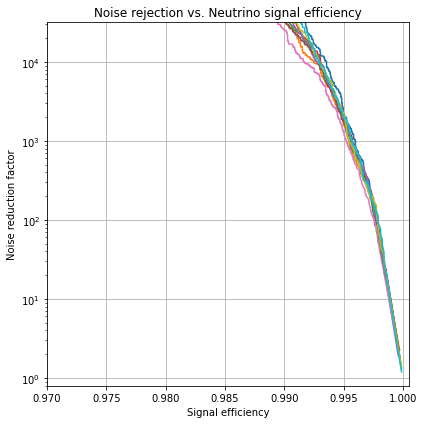

In [ ]:


fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for i in range(10):
  ax.plot(s_vec[i,:], n_vec[i,:], label=str(i+1)+'.')

"""ax.plot(s_vec[0,:], n_vec[0,:], label='1.')
ax.plot(s_vec[1,:], n_vec[1,:], label='2.')
ax.plot(s_vec[2,:], n_vec[2,:], label='3.')
ax.plot(s_vec[3,:], n_vec[3,:], label='4.')
ax.plot(s_vec[4,:], n_vec[4,:], label='5.')
ax.plot(s_vec[5,:], n_vec[5,:], label='6.')
ax.plot(s_vec[6,:], n_vec[6,:], label='7.')
ax.plot(s_vec[7,:], n_vec[7,:], label='8.')
ax.plot(s_vec[8,:], n_vec[8,:], label='9.')
ax.plot(s_vec[9,:], n_vec[9,:], label='10.')"""
plt.xlim(0.97, 1.0005)
plt.ylim(10**(-0.1), 10**4.5)
ax.set_xlabel("Signal efficiency")
ax.set_ylabel("Noise reduction factor")
ax.semilogy(True)
ax.grid(True)
#ax.legend(title = 'Nr. of trainings:')
ax.set_title("Noise rejection vs. Neutrino signal efficiency")
fig.tight_layout()
fig.savefig("fcn_stability.png", bbox_inches="tight", dpi=125)
files.download("fcn_stability.png")
plt.show()